# Human Personality Data Analysis

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df = pd.read_csv("dataset\personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## Exploratory Data Analysis

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
# Check for missing data
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
# Rows with missing data
missing_value_rows = df[df.isnull().any(axis=1)]
len(missing_value_rows)

423

In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


We can see a few things about the dataset now:
- There are 2900 entries in this dataset.
- There are a number of missing data from each column(423 rows have missing data).
- There are three non-numerical rows.
- The remaining data are various activites with a differing numerical range.
- The target variable is the "Personality" column (contains Introvert and Extrovert).

<Axes: xlabel='Personality', ylabel='count'>

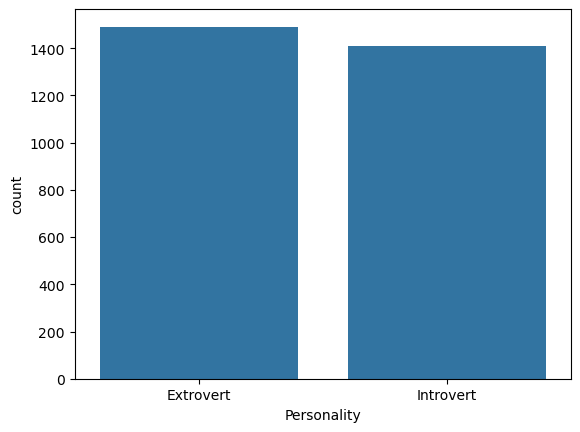

In [7]:
# Countplot of Personalities
sns.countplot(df, x= "Personality")

## Data Preprocesssing

### Dealing with missing values

In [8]:
# Creating a copy of dataset
df_copy = df.copy()
df_copy.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [9]:
# Finding numerical columns
num_columns = df_copy.select_dtypes(include="number").columns
num_columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

In [10]:
# Filling missing numerical values with the median
df_copy[num_columns] = df_copy[num_columns].fillna(df_copy[num_columns].median())

In [11]:
# Checking for change
df_copy.isna().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

As for the missing categorical data, we will be dropping it as an attempt to fill them may impact our dataset adversely if we try to fill it.

In [12]:
# Finding Categorical columns
cat_columns = df_copy.select_dtypes(include= "object").columns
cat_columns

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

In [13]:
# Dropping all remaining missing values
df_copy.dropna(inplace= True)

In [14]:
# Checking for change
df_copy.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

### Converting Categorical data to Numerical data

In [15]:
# Coverting categorical data
df_copy[cat_columns  + "_num"] = df_copy[cat_columns].replace({ "Yes": 1, "No": 0, "Extrovert": 0, "Introvert": 1})

We have converted the categorical data to numeric(1 is Yes and Introvert while 0 is No and Extrovert). Now we can deal with scaling.

## Data Analysis


 First, Let's explore our entries.

### Distribution of Personality Types

In [16]:
# Assuming 'df' is your DataFrame after loading the dataset
fig = px.bar(df, x='Personality', title='Distribution of Personality Types',
             labels={'Personality': 'Personality Type', 'count': 'Number of Individuals'},
             color='Personality', # Color bars by personality type
             color_discrete_map={'Introvert': 'blue', 'Extrovert': 'orange'})
fig.update_layout(xaxis_title="Personality Type", yaxis_title="Count")
fig.show();

Now let us find the prevalent connections in our dataset.

### Numerical Features by Personality Types

In [17]:
# Box plot for Friends_circle_size by Personality
def num_features_plot(column, label):
    # Box plot for Friends_circle_size by Personality
    fig = px.box(df, x='Personality', y=column, color='Personality',
                 title=label+' by Personality Type',
                 labels={column: label, 'Personality': 'Personality Type'})
    fig.update_layout(yaxis_title=label)
    fig.show()

In [18]:
# Size of Friends circle by Personality
df_columns = df_copy.columns.drop(['Personality', 'Stage_fear_num', 'Drained_after_socializing',
                                   'Drained_after_socializing_num', 'Stage_fear','Personality_num'])
labels = ["Amount of Time Spent Alone", "Frequency of Social Event Attendance", "Frequency of going out",
          "Size of Friend Circle", "Frequency of Social Media Posts"]

for a,b in zip(df_columns, labels):
    num_features_plot(a,b)

### Indicators of Social Anxiety

In [19]:
# Scatter plot of social event attendance and going outside based on Stage fear
fig = px.scatter(df_copy, x= "Social_event_attendance", y= "Going_outside", 
                 color= "Stage_fear", 
                 title= "Social Event Attendance vs. Going Outside by Stage Fear",
                 labels={'Social_event_attendance': "Social Event Attendance", 'Going_outside': 'Frequency of going out'},
                 hover_data=['Time_spent_Alone', 'Friends_circle_size'])

fig.update_layout(height= 600, width = 800, 
                  xaxis_title="Social Event Attendance",
                  yaxis_title="Frequency of going out")
                  
fig.show()

As expected, we can see that there is inverse relationship between stage fear and the want to go outside and to social events. People who do not have stage fear tend to be more socially active in real-world settings. They go outside more frequently and attend more events. Those with stage fear appear more socially withdrawn, at least in public/interactive contexts.

### Social Energy Management

In [20]:
# Scatter plot of Social event attendance and Time spent alone based on Personality
fig = px.scatter(df_copy, x= "Time_spent_Alone", y= "Social_event_attendance", color= "Personality", 
                 title= "Personalities according to Time Spent alone and Social event attendance",
                 labels={'Time_spent_Alone': "Amount of Time Spent Alone", 'Social_event_attendance': 'Frequency of Social Event Attendance'},
                 hover_data=['Going_outside', 'Friends_circle_size',])

fig.update_layout(height= 600, width = 800, 
                  xaxis_title="Amount of Time Spent Alone",
                  yaxis_title="Frequency of Social Event Attendance")
                  
fig.show()

We can see that while there are some outliers, there is a generally inverse relationship between social event attendance and time spent alone. Introverts spend more time alone and as such have low social event attendance. Extroverts spend more time at social events and less time alone.

### Real VS Digital Interaction

In [21]:
# Scatter plot of Time spent alone and Post frequency based on Personalities
fig = px.scatter(df_copy, x= "Time_spent_Alone", y= "Post_frequency", color= "Personality", 
                 title= "Personalities according to Time Spent alone and Frequency of Social Media Posts",
                 labels={'Time_spent_Alone': "Amount of Time Spent Alone", 'Post_frequency': "Frequency of Social Media Posts"},
                 hover_data=['Social_event_attendance', 'Friends_circle_size'])

fig.update_layout(height= 600, width = 800, 
                  xaxis_title="Amount of Time Spent Alone",
                  yaxis_title="Frequency of Social Media Posts")
                  
fig.show()

We can see that, while there are some outliers, there is a potential inverse correlation exists between Time_spent_Alone and Post_frequency. Extroverts are active both socially and digitally. Introverts retreat into solitude and low online posting. We will be exploring further in the next plot.

In [22]:
# Scatter plot of Friends circle size and Post frequency based on Personalities
fig = px.scatter(df_copy, x= "Friends_circle_size", y= "Post_frequency", color= "Personality", 
                 title= "Personalities according to Size of Friends Circle and Frequency of Social Media Posts",
                 labels={'Friends_circle_size': "Size of Friends Circle", 'Post_frequency': "Frequency of Social Media Posts"},
                 hover_data=['Social_event_attendance'])

fig.update_layout(height= 600, width = 800, 
                  xaxis_title="Size of Friends Circle",
                  yaxis_title="Frequency of Social Media Posts")
                  
fig.show()

We can see that, while there are some outliers, there is a direct correlation between the size of a persons friend circle and the frequency of their posts online. Extroverts are active both socially and digitally. Introverts retreat into solitude and low online posting. This debunks the myth that people who are introverted only lack real life interactions. This along with out previous insights debunks the myth that people who are introverted only lack real life interactions.

### Quantity and Quality of Social Interaction


In [23]:
fig = px.scatter(df_copy, x="Social_event_attendance", y="Friends_circle_size", color="Drained_after_socializing",
                 title="Social interaction according to Friends circle size, Social event attendance and Drain",
                 labels={"Social_event_attendance": "Social Event Attendance","Friends_circle_size": "Friends Circle Size",
                         "Drained_after_socializing": "Drain from Socializing"},
                 hover_data=["Personality"])

fig.update_layout(width=1000, height=600,legend_title_text="Drain from Socializing",
                  xaxis_title="Social Event Attendance", yaxis_title="Friends Circle Size")

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

fig.show()

We can see that there is a direct relationship between the lack of social event attendance and friends and feeling drained after social interactions. People who feel drained after social interactions can be attend less social events and keep a smaller group of friends while people who do not feel drained do the opposite.

### Correlaton Matrix

In [24]:
df_copy.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality', 'Stage_fear_num',
       'Drained_after_socializing_num', 'Personality_num'],
      dtype='object')

In [25]:
# Create a copy and encode binary categorical features for correlation
df_corr = df_copy.drop(cat_columns, axis= 1)

correlation_matrix = df_corr.corr()

fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='RdBu_r', # Red-Blue reversed colormap
                title='Interactive Correlation Matrix of Numerical Features',
                labels=dict(color="Correlation"))
fig.update_layout(height = 700,
                  xaxis_nticks=len(df_corr), yaxis_nticks=len(df_corr))
fig.show()

## Exporting Dataset

In [26]:
drop_columns = ["Stage_fear_num","Drained_after_socializing_num","Personality_num"]
df_copy = df_copy.drop(drop_columns, axis= 1)
df_copy.to_csv("dataset/processed_data.csv", index= False)

### Conclusion
From the analysis and correlation matrix perfomed above, we can find a lot of insights:
- Clear Personality Patterns: It seems Introverts often spend more time alone, dislike crowds, and feel socially drained while extroverts enjoy social events, being outdoors, and have more friends.
- Online vs. Real-Life Activity: Frequent posters on social media also tend to go out more and attend events , showing that online activity often reflects real-life sociability.
- Redundant Features Alert: Stage fear and feeling drained after socializing are perfectly correlated (1.0), suggesting they measure the same thing. There may need to be some feature engineering before any modelling takes place
